In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
country_reservoir = pd.read_csv('/content/drive/My Drive/cmpe256-data/ReservoirSensor-County.csv',low_memory=False)
country_reservoir.head()

,Station,County
0,KLM,SISKIYOU
1,GBR,SISKIYOU
2,IRG,SISKIYOU
3,CLK,MODOC
4,DWN,SISKIYOU


In [15]:
outflow = pd.read_csv('/content/drive/My Drive/cmpe256-data/outflow2.csv',low_memory=False)
outflow.head()

,Sensor,Date,Value
0,BER,200501,51.533333
1,BER,200502,53.166667
2,BER,200503,638.333333
3,BER,200504,684.700000
4,BER,200505,540.000000


In [16]:
outflow.head()

,Sensor,Date,Value
0,BER,200501,51.533333
1,BER,200502,53.166667
2,BER,200503,638.333333
3,BER,200504,684.700000
4,BER,200505,540.000000


In [0]:
outflow['DateTime'] = pd.to_datetime(outflow['Date'],format='%Y%m')
outflow['Year'] = pd.to_datetime(outflow['Date'],format='%Y%m').dt.year
outflow['Month'] = pd.to_datetime(outflow['Date'],format='%Y%m').dt.month
#outflow.set_index('DateTime',inplace=True)

In [18]:
country_reservoir.Station.unique()

array(['KLM ', 'GBR ', 'IRG ', 'CLK ', 'DWN ', 'CLE ', 'LEW ', 'RTD ',
       'PLL ', 'MNC ', 'WRS ', 'SLJ ', 'NCA ', 'KNT ', 'BMP ', 'LGT ',
       'APN ', 'HNN ', 'BIO ', 'USL ', 'CHB ', 'DLV ', 'SAT ', 'CVE ',
       'AST ', 'LNG ', 'LRA ', 'CYC ', 'CRY ', 'SPB ', 'LFY ', 'SNN ',
       'ATN ', 'WHR ', 'SLN ', 'NCM ', 'TWT ', 'CCH ', 'GBL ', 'MAT ',
       'CSI ', 'PYM ', 'BQC ', 'CAS ', 'PRU ', 'CGS ', 'SGB ', 'MHW ',
       'PRR ', 'HMT ', 'BRV ', 'SVO ', 'VLP ', 'SGC ', 'RLC ', 'DMV ',
       'VIL ', 'STD ', 'HDG ', 'SKN ', 'HNS ', 'CUY ', 'SVT ', 'MMR ',
       'ELC ', 'JNN ', 'MRR ', 'MOR ', 'BRT ', 'LVD ', 'SW3 ', 'LOT ',
       'SHA ', 'KES ', 'WHI ', 'MCO ', 'IRC ', 'BIT ', 'PT7 ', 'PT6 ',
       'BLB ', 'STG ', 'EPK ', 'MMW ', 'ALM ', 'ANT ', 'BTV ', 'BCL ',
       'DAV ', 'FRD ', 'LGV ', 'SLC ', 'ORO ', 'THD ', 'TFR ', 'TMT ',
       'TAB ', 'BUL ', 'RLL ', 'CFW ', 'LVY ', 'FMD ', 'HHL ', 'LON ',
       'EDN ', 'UNV ', 'ICH ', 'SLB ', 'CPL ', 'FOL ', 'SIV ', 'NAT ',
      

In [19]:
country_reservoir['Station'] = country_reservoir['Station'].apply(lambda x: x.strip())
merged_outflow = pd.merge(outflow,country_reservoir,how='inner', left_on='Sensor', right_on='Station')
merged_outflow.head()

,Sensor,Date,Value,DateTime,Year,Month,Station,County
0,BER,200501,51.533333,2005-01-01,2005,1,BER,NAPA
1,BER,200502,53.166667,2005-02-01,2005,2,BER,NAPA
2,BER,200503,638.333333,2005-03-01,2005,3,BER,NAPA
3,BER,200504,684.700000,2005-04-01,2005,4,BER,NAPA
4,BER,200505,540.000000,2005-05-01,2005,5,BER,NAPA


In [20]:
merged_outflow['PortableWaterInGallons'] = merged_outflow['Value'].apply(lambda x:  x* 748)
merged_outflow.head()

,Sensor,Date,Value,DateTime,Year,Month,Station,County,PortableWaterInGallons
0,BER,200501,51.533333,2005-01-01,2005,1,BER,NAPA,38546.933331
1,BER,200502,53.166667,2005-02-01,2005,2,BER,NAPA,39768.666669
2,BER,200503,638.333333,2005-03-01,2005,3,BER,NAPA,477473.333308
3,BER,200504,684.700000,2005-04-01,2005,4,BER,NAPA,512155.600000
4,BER,200505,540.000000,2005-05-01,2005,5,BER,NAPA,403920.000000


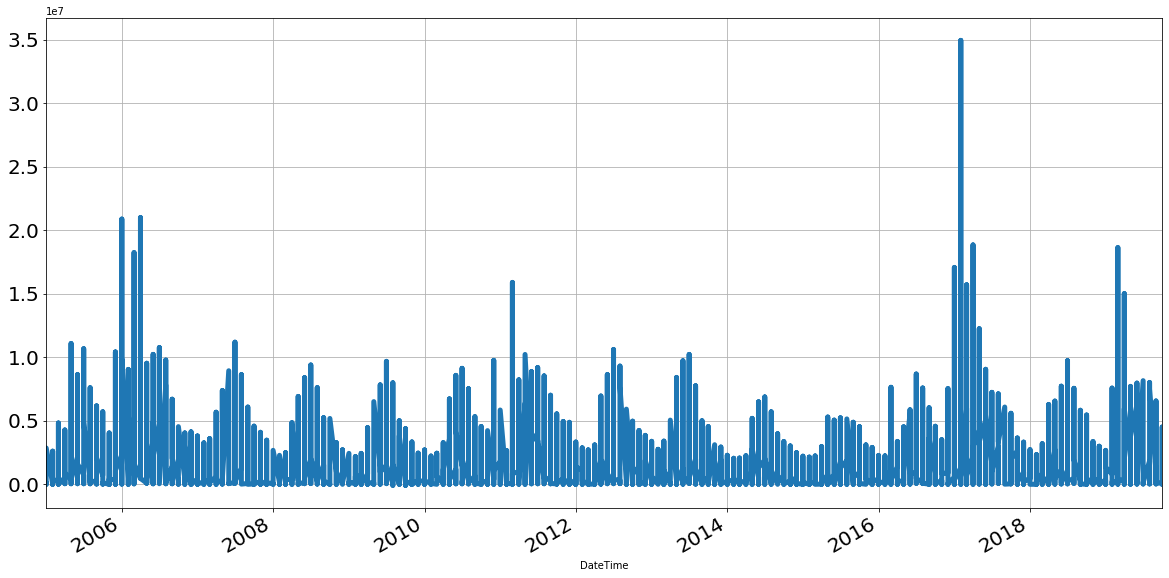

In [21]:
merged_outflow.set_index('DateTime',inplace=True)
merged_outflow['PortableWaterInGallons'].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)



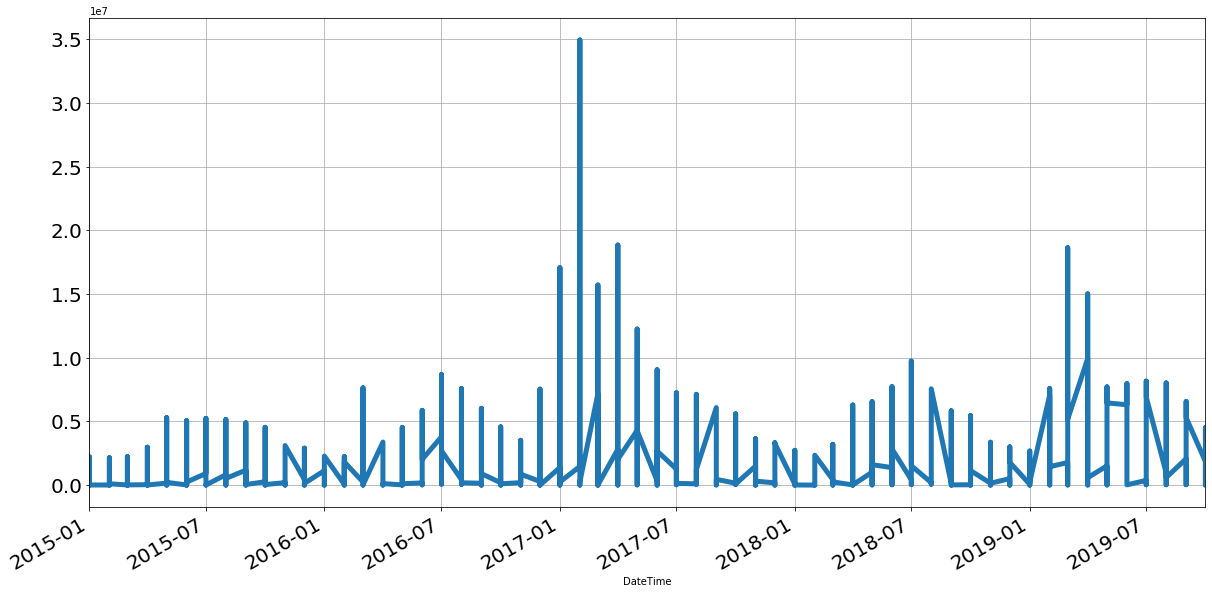

In [25]:
merged_outflow1 = merged_outflow[merged_outflow['Year'] > 2014]
#merged_outflow1['DateTime'] = pd.to_datetime(merged_outflow['Date'],format='%Y%m')
#merged_outflow1['Year'] = pd.to_datetime(merged_outflow['Date'],format='%Y%m').dt.year
#merged_outflow1['Month'] = pd.to_datetime(merged_outflow['Date'],format='%Y%m').dt.month
#merged_outflow1.set_index('DateTime', inplace=True)
merged_outflow1['PortableWaterInGallons'].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)


In [26]:
merged_outflow_filtered = merged_outflow[(merged_outflow['Year'] == 2015) & (merged_outflow['Month'] == 6)]
merged_outflow_filtered

,Sensor,Date,Value,Year,Month,Station,County,PortableWaterInGallons
DateTime,,,,,,,,
2015-06-01,BER,201506,603.766667,2015,6,BER,NAPA,4.516175e+05
2015-06-01,BLB,201506,222.166667,2015,6,BLB,TEHAMA,1.661807e+05
2015-06-01,BRD,201506,163.000000,2015,6,BRD,TUOLUMNE,1.219240e+05
2015-06-01,BUC,201506,0.000000,2015,6,BUC,MADERA,0.000000e+00
2015-06-01,CCH,201506,25.700000,2015,6,CCH,SANTA BARBARA,1.922360e+04
2015-06-01,CLE,201506,1744.200000,2015,6,CLE,TRINITY,1.304662e+06
2015-06-01,CMN,201506,583.900000,2015,6,CMN,SAN JOAQUIN,4.367572e+05
2015-06-01,DNP,201506,1521.700000,2015,6,DNP,TUOLUMNE,1.138232e+06
2015-06-01,DON,201506,316.666667,2015,6,DON,TUOLUMNE,2.368667e+05


In [27]:
merged_outflow_filtered = merged_outflow.groupby(['Year','Month'])['PortableWaterInGallons'].sum().reset_index()
merged_outflow_filtered.head()

,Year,Month,PortableWaterInGallons
0,2005,1,1.691664e+07
1,2005,2,2.083232e+07
2,2005,3,3.144211e+07
3,2005,4,3.251264e+07
4,2005,5,8.004595e+07


In [28]:
merged_outflow_filtered.shape

(178, 3)

In [29]:
supplierData = pd.read_csv('/content/drive/My Drive/cmpe256-data/uw-supplier-data-2.csv',low_memory=False)
supplierData.head()

,Supplier Name,Stage Invoked,Mandatory Restrictions,Reporting Month,REPORTED Total Monthly Potable Water,REPORTED Total Monthly Potable Water Production 2013,REPORTED Monthly CII,REPORTED Monthly Ag Use,REPORTED Monthly Ag Use 2013,REPORTED Recycled Water,REPORTED Units,Total Population Served,REPORTED Residential Gallons,Supplier has Agricultural Water,CALCULATED Total Monthly Potable Water Production,CALCULATED Total Monthly Potable Water Production 2013 Gallons,CALCULATED Monthly CII Reporting Month,CALCULATED R-GPCD Reporting Month,% Residential Use,Hydrologic Region,Water Days Allowed/Week,Follow-up Actions,Warnings Issued,Rate Penalties Assessed,Penalties Assessed
0,East Bay Municipal Utilities District,0,No,9/15/2019,5916.8,6528.4,1171,NaN,NaN,NaN,MG,"1,440,000",84.0,No,"5,916,800,000","6,528,400,000","1,171,000,000",83.5,61,San Francisco Bay,7,0,0,0,0
1,East Bay Municipal Utilities District,0,No,8/15/2019,6459.2,7172.3,1362.2,NaN,NaN,NaN,MG,"1,440,000",88.0,No,"6,459,200,000","7,172,300,000","1,362,200,000",88.3,61,San Francisco Bay,7,0,0,0,0
2,East Bay Municipal Utilities District,0,No,7/15/2019,6317.4,7452.2,1172,NaN,NaN,NaN,MG,"1,440,000",85.0,No,"6,317,400,000","7,452,200,000","1,172,000,000",84.9,60,San Francisco Bay,7,0,0,0,0
3,East Bay Municipal Utilities District,0,No,6/15/2019,5880.6,6927.5,901,NaN,NaN,NaN,MG,"1,440,000",82.0,No,"5,880,600,000","6,927,500,000","901,000,000",83.0,61,San Francisco Bay,7,0,0,0,0
4,East Bay Municipal Utilities District,0,No,5/15/2019,5203.6,6716.5,819,NaN,NaN,NaN,MG,"1,440,000",70.0,No,"5,203,600,000","6,716,500,000","819,000,000",69.9,60,San Francisco Bay,7,0,0,0,0


In [30]:
supplierData.shape

(25210, 25)

In [0]:
supplierData['YearMonth'] = pd.to_datetime(supplierData['Reporting Month'],format='%m/%d/%Y')
supplierData['ReportingYear'] = pd.to_datetime(supplierData['Reporting Month'],format='%m/%d/%Y').dt.year
supplierData['ReportingMonth'] = pd.to_datetime(supplierData['Reporting Month'],format='%m/%d/%Y').dt.month

In [32]:
supplierData['Total Population Served'] = supplierData['Total Population Served'].apply(lambda x: x.replace(',',''))
supplierData['Total Population Served']

0        1440000
1        1440000
2        1440000
3        1440000
4        1440000
          ...   
25205       8825
25206       8825
25207       8825
25208       8825
25209       8825
Name: Total Population Served, Length: 25210, dtype: object

In [0]:
supplierData['CALCULATED Total Monthly Potable Water Production'] = supplierData['CALCULATED Total Monthly Potable Water Production'].apply(lambda x:x.replace(',','')) 
supplierData['CALCULATED Total Monthly Potable Water Production 2013 Gallons'] = supplierData['CALCULATED Total Monthly Potable Water Production 2013 Gallons'].apply(lambda x:x.replace(',','')) 
supplierData['CALCULATED Monthly CII Reporting Month'] = supplierData['CALCULATED Monthly CII Reporting Month'].apply(lambda x:x.replace(',','')) 
supplierData['REPORTED Monthly Ag Use'].fillna(0)
supplierData['REPORTED Monthly Ag Use'] = supplierData['REPORTED Monthly Ag Use'].apply(lambda x : float(x) if (x != 'na' and x != 'not avail.') else 0)
supplierData['REPORTED Recycled Water'].fillna(0)
supplierData['REPORTED Recycled Water']= supplierData['REPORTED Recycled Water'].apply(lambda x : float(x) if x != 'na' else 0)
#supplierData['Hydrologic Region']= supplierData['Hydrologic Region'].apply(lambda x : float(x) if x != 'na' else 0)
#supplierData['Water Days Allowed/Week']= supplierData['Water Days Allowed/Week'].apply(lambda x : float(x) if x != 'na' else 0)
supplierData['CALCULATED Total Monthly Potable Water Production']= supplierData['CALCULATED Total Monthly Potable Water Production'].apply(lambda x : float(x) if x != ' Null ' else 0)
supplierData['CALCULATED Total Monthly Potable Water Production 2013 Gallons']= supplierData['CALCULATED Total Monthly Potable Water Production 2013 Gallons'].apply(lambda x : float(x) if x != ' Null ' else 0)
supplierData['CALCULATED Monthly CII Reporting Month']= supplierData['CALCULATED Monthly CII Reporting Month'].apply(lambda x : float(x) if x != ' Null ' else 0)
#supplierData['Supplier has Agricultural Water']= supplierData['Supplier has Agricultural Water'].apply(lambda x : float(x) if x != ' No ' else 0)
supplierData['REPORTED Monthly CII']= supplierData['REPORTED Monthly CII'].apply(lambda x : float(x) if (x != 'na' and x != 'uk' and x != 'not avail.') else 0)
supplierData['REPORTED Monthly Ag Use']= supplierData['REPORTED Monthly Ag Use'].apply(lambda x : float(x) if (x != 'na' and x != 'not avail.') else 0)
supplierData['REPORTED Monthly Ag Use 2013']= supplierData['REPORTED Monthly Ag Use 2013'].apply(lambda x : float(x) if x != 'na' else 0)
supplierData['Total Population Served'] = supplierData['Total Population Served'].apply(lambda x : float(x) if x != 'na' else 0)


In [34]:
supplierData['Hydrologic Region Codes'] = supplierData['Hydrologic Region'].astype('category').cat.codes
supplierData['Hydrologic Region Codes'].unique()

array([5, 0, 7, 6, 4, 1, 2, 9, 8, 3])

In [35]:
supplierData['Water Days Allowed/Week'] = supplierData['Water Days Allowed/Week'].astype('category').cat.codes
supplierData['Water Days Allowed/Week'].unique()

array([ 7, -1,  2,  3,  1,  4,  0,  5,  6,  8])

In [0]:
supplierData['Supplier has Agricultural Water'] = supplierData['Supplier has Agricultural Water'].astype('category').cat.codes

In [0]:
supplierData['REPORTED Recycled Water'] = supplierData['REPORTED Recycled Water'].fillna(0)
supplierData['REPORTED Monthly Ag Use'] = supplierData['REPORTED Monthly Ag Use'].fillna(0)

In [38]:
supplierData.columns

Index(['Supplier Name', 'Stage Invoked', 'Mandatory Restrictions',
       'Reporting Month', 'REPORTED Total Monthly Potable Water',
       'REPORTED Total Monthly Potable Water Production 2013',
       'REPORTED Monthly CII', 'REPORTED Monthly Ag Use',
       'REPORTED Monthly Ag Use 2013', 'REPORTED Recycled Water',
       'REPORTED Units', 'Total Population Served',
       'REPORTED Residential Gallons', 'Supplier has Agricultural Water',
       'CALCULATED Total Monthly Potable Water Production',
       'CALCULATED Total Monthly Potable Water Production 2013 Gallons',
       'CALCULATED Monthly CII Reporting Month',
       'CALCULATED R-GPCD Reporting Month', '% Residential Use',
       'Hydrologic Region', 'Water Days Allowed/Week', 'Follow-up Actions',
       'Warnings Issued', 'Rate Penalties Assessed ', 'Penalties Assessed',
       'YearMonth', 'ReportingYear', 'ReportingMonth',
       'Hydrologic Region Codes'],
      dtype='object')

In [39]:
merged_supplierData_filtered = supplierData.groupby(['ReportingYear','ReportingMonth'])['REPORTED Total Monthly Potable Water','REPORTED Total Monthly Potable Water Production 2013','Total Population Served','CALCULATED Total Monthly Potable Water Production 2013 Gallons','CALCULATED Total Monthly Potable Water Production'].sum().reset_index()
merged_supplierData_filtered.head()

,ReportingYear,ReportingMonth,REPORTED Total Monthly Potable Water,REPORTED Total Monthly Potable Water Production 2013,Total Population Served,CALCULATED Total Monthly Potable Water Production 2013 Gallons,CALCULATED Total Monthly Potable Water Production
0,2014,6,1.623025e+10,1.806858e+10,34448471.0,2.158438e+11,2.062988e+11
1,2014,7,1.806528e+10,2.049233e+10,35576282.0,2.402571e+11,2.222755e+11
2,2014,8,1.707104e+10,2.023918e+10,35672735.0,2.363517e+11,2.080143e+11
3,2014,9,1.465528e+10,1.662744e+10,35707104.0,2.155333e+11,1.926042e+11
4,2014,10,1.134043e+10,1.284851e+10,35654873.0,1.908522e+11,1.778200e+11


In [0]:
merged_supplierData_filtered['DateTime'] =  pd.to_datetime(merged_supplierData_filtered['ReportingYear'])
merged_supplierData_filtered.set_index('DateTime',inplace=True)

In [41]:
merged_supplierData_filtered

,ReportingYear,ReportingMonth,REPORTED Total Monthly Potable Water,REPORTED Total Monthly Potable Water Production 2013,Total Population Served,CALCULATED Total Monthly Potable Water Production 2013 Gallons,CALCULATED Total Monthly Potable Water Production
DateTime,,,,,,,
1970-01-01 00:00:00.000002014,2014,6,1.623025e+10,1.806858e+10,34448471.0,2.158438e+11,2.062988e+11
1970-01-01 00:00:00.000002014,2014,7,1.806528e+10,2.049233e+10,35576282.0,2.402571e+11,2.222755e+11
1970-01-01 00:00:00.000002014,2014,8,1.707104e+10,2.023918e+10,35672735.0,2.363517e+11,2.080143e+11
1970-01-01 00:00:00.000002014,2014,9,1.465528e+10,1.662744e+10,35707104.0,2.155333e+11,1.926042e+11
1970-01-01 00:00:00.000002014,2014,10,1.134043e+10,1.284851e+10,35654873.0,1.908522e+11,1.778200e+11
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000002019,2019,5,1.139816e+10,1.657367e+10,34345814.0,1.903400e+11,1.364143e+11
1970-01-01 00:00:00.000002019,2019,6,1.408083e+10,1.798270e+10,34057754.0,2.015248e+11,1.575860e+11
1970-01-01 00:00:00.000002019,2019,7,1.641957e+10,2.019025e+10,33576757.0,2.148299e+11,1.762875e+11


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 719163.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 719163.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


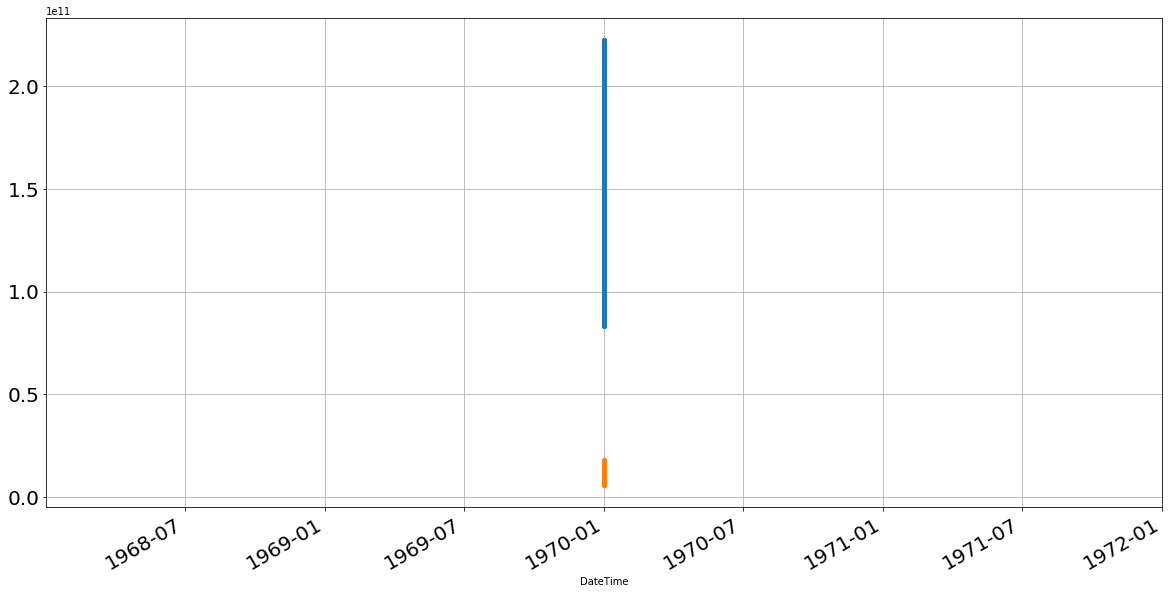

In [42]:
merged_supplierData_filtered['CALCULATED Total Monthly Potable Water Production'].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)
merged_supplierData_filtered['REPORTED Total Monthly Potable Water'].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)

In [43]:
filter_columns=['Hydrologic Region Codes','ReportingYear', 'ReportingMonth','REPORTED Monthly Ag Use','REPORTED Recycled Water','REPORTED Total Monthly Potable Water','Total Population Served','REPORTED Residential Gallons','CALCULATED Total Monthly Potable Water Production']
filtered_water_data = supplierData[filter_columns]
filtered_water_data.head()

,Hydrologic Region Codes,ReportingYear,ReportingMonth,REPORTED Monthly Ag Use,REPORTED Recycled Water,REPORTED Total Monthly Potable Water,Total Population Served,REPORTED Residential Gallons,CALCULATED Total Monthly Potable Water Production
0,5,2019,9,0.0,0.0,5916.8,1440000.0,84.0,5.916800e+09
1,5,2019,8,0.0,0.0,6459.2,1440000.0,88.0,6.459200e+09
2,5,2019,7,0.0,0.0,6317.4,1440000.0,85.0,6.317400e+09
3,5,2019,6,0.0,0.0,5880.6,1440000.0,82.0,5.880600e+09
4,5,2019,5,0.0,0.0,5203.6,1440000.0,70.0,5.203600e+09


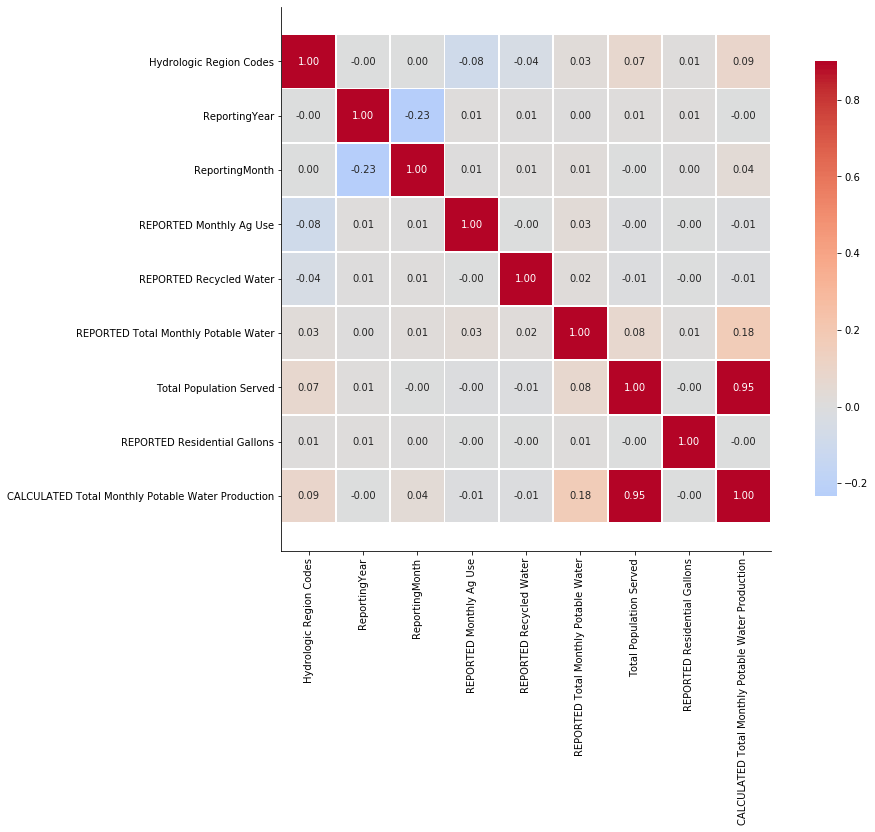

In [44]:
corr = filtered_water_data.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

In [45]:
merged_outflow.head()

,Sensor,Date,Value,Year,Month,Station,County,PortableWaterInGallons
DateTime,,,,,,,,
2005-01-01,BER,200501,51.533333,2005,1,BER,NAPA,38546.933331
2005-02-01,BER,200502,53.166667,2005,2,BER,NAPA,39768.666669
2005-03-01,BER,200503,638.333333,2005,3,BER,NAPA,477473.333308
2005-04-01,BER,200504,684.700000,2005,4,BER,NAPA,512155.600000
2005-05-01,BER,200505,540.000000,2005,5,BER,NAPA,403920.000000


In [46]:
filtered_water_data.head()

,Hydrologic Region Codes,ReportingYear,ReportingMonth,REPORTED Monthly Ag Use,REPORTED Recycled Water,REPORTED Total Monthly Potable Water,Total Population Served,REPORTED Residential Gallons,CALCULATED Total Monthly Potable Water Production
0,5,2019,9,0.0,0.0,5916.8,1440000.0,84.0,5.916800e+09
1,5,2019,8,0.0,0.0,6459.2,1440000.0,88.0,6.459200e+09
2,5,2019,7,0.0,0.0,6317.4,1440000.0,85.0,6.317400e+09
3,5,2019,6,0.0,0.0,5880.6,1440000.0,82.0,5.880600e+09
4,5,2019,5,0.0,0.0,5203.6,1440000.0,70.0,5.203600e+09


In [47]:
merged_outflow_filtered.head()

,Year,Month,PortableWaterInGallons
0,2005,1,1.691664e+07
1,2005,2,2.083232e+07
2,2005,3,3.144211e+07
3,2005,4,3.251264e+07
4,2005,5,8.004595e+07


In [48]:
filtered_water_data.head()

,Hydrologic Region Codes,ReportingYear,ReportingMonth,REPORTED Monthly Ag Use,REPORTED Recycled Water,REPORTED Total Monthly Potable Water,Total Population Served,REPORTED Residential Gallons,CALCULATED Total Monthly Potable Water Production
0,5,2019,9,0.0,0.0,5916.8,1440000.0,84.0,5.916800e+09
1,5,2019,8,0.0,0.0,6459.2,1440000.0,88.0,6.459200e+09
2,5,2019,7,0.0,0.0,6317.4,1440000.0,85.0,6.317400e+09
3,5,2019,6,0.0,0.0,5880.6,1440000.0,82.0,5.880600e+09
4,5,2019,5,0.0,0.0,5203.6,1440000.0,70.0,5.203600e+09


In [51]:
merged = pd.merge(merged_supplierData_filtered,merged_outflow_filtered,how='inner', left_on=['ReportingYear','ReportingMonth'], right_on=['Year','Month'])
merged.head()


,ReportingYear,ReportingMonth,REPORTED Total Monthly Potable Water,REPORTED Total Monthly Potable Water Production 2013,Total Population Served,CALCULATED Total Monthly Potable Water Production 2013 Gallons,CALCULATED Total Monthly Potable Water Production,Year,Month,PortableWaterInGallons
0,2014,6,1.623025e+10,1.806858e+10,34448471.0,2.158438e+11,2.062988e+11,2014,6,3.321437e+07
1,2014,7,1.806528e+10,2.049233e+10,35576282.0,2.402571e+11,2.222755e+11,2014,7,3.684339e+07
2,2014,8,1.707104e+10,2.023918e+10,35672735.0,2.363517e+11,2.080143e+11,2014,8,2.810061e+07
3,2014,9,1.465528e+10,1.662744e+10,35707104.0,2.155333e+11,1.926042e+11,2014,9,1.873179e+07
4,2014,10,1.134043e+10,1.284851e+10,35654873.0,1.908522e+11,1.778200e+11,2014,10,1.575268e+07


In [52]:
merged.columns

Index(['ReportingYear', 'ReportingMonth',
       'REPORTED Total Monthly Potable Water',
       'REPORTED Total Monthly Potable Water Production 2013',
       'Total Population Served',
       'CALCULATED Total Monthly Potable Water Production 2013 Gallons',
       'CALCULATED Total Monthly Potable Water Production', 'Year', 'Month',
       'PortableWaterInGallons'],
      dtype='object')

In [0]:
columns = ['REPORTED Total Monthly Potable Water','PortableWaterInGallons','Total Population Served','CALCULATED Total Monthly Potable Water Production']
merged_filtered = merged[columns]

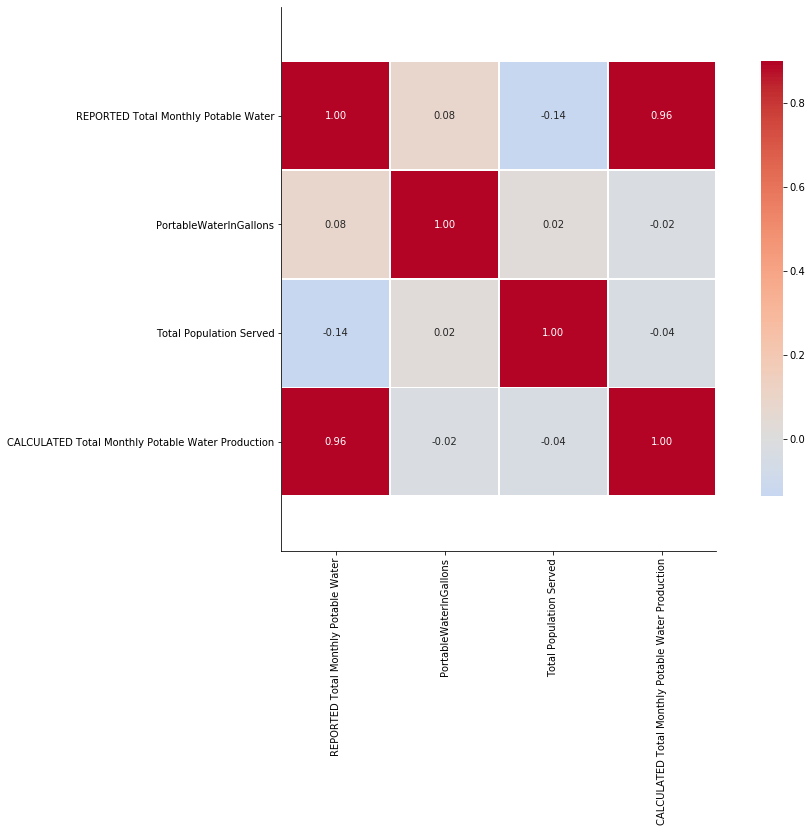

In [54]:
corr = merged_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

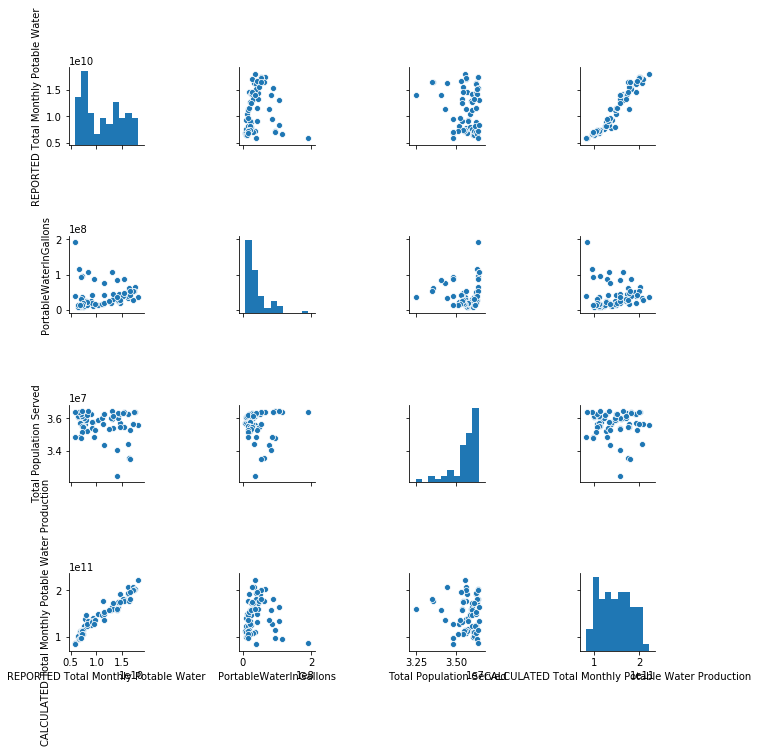

In [55]:
sns.pairplot(merged_filtered)

In [56]:
merged

,ReportingYear,ReportingMonth,REPORTED Total Monthly Potable Water,REPORTED Total Monthly Potable Water Production 2013,Total Population Served,CALCULATED Total Monthly Potable Water Production 2013 Gallons,CALCULATED Total Monthly Potable Water Production,Year,Month,PortableWaterInGallons
0,2014,6,1.623025e+10,1.806858e+10,34448471.0,2.158438e+11,2.062988e+11,2014,6,3.321437e+07
1,2014,7,1.806528e+10,2.049233e+10,35576282.0,2.402571e+11,2.222755e+11,2014,7,3.684339e+07
2,2014,8,1.707104e+10,2.023918e+10,35672735.0,2.363517e+11,2.080143e+11,2014,8,2.810061e+07
3,2014,9,1.465528e+10,1.662744e+10,35707104.0,2.155333e+11,1.926042e+11,2014,9,1.873179e+07
4,2014,10,1.134043e+10,1.284851e+10,35654873.0,1.908522e+11,1.778200e+11,2014,10,1.575268e+07
...,...,...,...,...,...,...,...,...,...,...
59,2019,5,1.139816e+10,1.657367e+10,34345814.0,1.903400e+11,1.364143e+11,2019,5,7.608681e+07
60,2019,6,1.408083e+10,1.798270e+10,34057754.0,2.015248e+11,1.575860e+11,2019,6,8.370210e+07
61,2019,7,1.641957e+10,2.019025e+10,33576757.0,2.148299e+11,1.762875e+11,2019,7,6.165836e+07
62,2019,8,1.654775e+10,1.858545e+10,33483586.0,2.105118e+11,1.807865e+11,2019,8,5.339528e+07


In [57]:
trainData, testData = train_test_split(merged_filter, train_size=0.7, random_state=100)


NameError: ignored